In [84]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df = pd.read_csv('/content/drive/MyDrive/meta_data.csv')
col = df.columns[0].split(' ')

In [87]:
df.head()

,REFNUM BG CLASS SEVERITY X Y RADIUS
0,mdb001 G CIRC B 535 425 197
1,mdb002 G CIRC B 522 280 69
2,mdb003 D NORM
3,mdb004 D NORM
4,mdb005 F CIRC B 477 133 30


In [88]:
# getting columns
cols = []
for i in col:
    cols.append(i)
cols

['REFNUM', 'BG', 'CLASS', 'SEVERITY', 'X', 'Y', 'RADIUS']

In [89]:
li = list(df[df.columns[0]])
df_li = []
for i in li:
    temp_li = []
    temp = i.split(' ')
    df_li.append(temp)
print(len(df_li))
temp_df = pd.DataFrame(df_li)
temp_df.head()
temp_df.columns = cols
temp_df.head()

330


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,None,None,None,None
3,mdb004,D,NORM,None,None,None,None
4,mdb005,F,CIRC,B,477,133,30


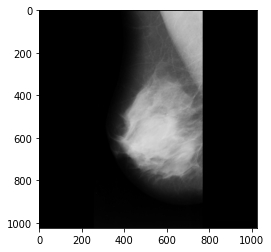

In [90]:
image = cv2.imread("/content/drive/MyDrive/dump/mdb001.png")
plt.imshow(image)
plt.show()

In [91]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (535, 425), 197, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

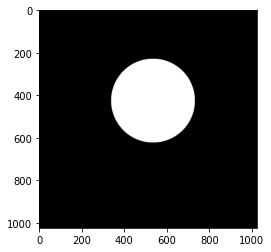

In [92]:
plt.imshow(mask,cmap='gray')
plt.show()

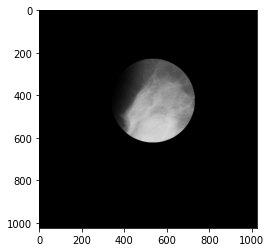

In [93]:
plt.imshow(masked,cmap='gray')
plt.show()

In [94]:
not_normal_df = temp_df[~temp_df['CLASS'].str.contains('NORM')]
print(not_normal_df.shape)
not_normal_df.dropna(subset=['X'],inplace=True)
print(not_normal_df.shape)
not_normal_df.head()

(123, 7)
(119, 7)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
4,mdb005,F,CIRC,B,477,133,30
5,mdb005,F,CIRC,B,500,168,26
10,mdb010,F,CIRC,B,525,425,33


In [95]:
print('Distribution of classes that are not normal :')
print('Total : ',not_normal_df.CLASS.value_counts().sum())
print()
print(not_normal_df.CLASS.value_counts())

Distribution of classes that are not normal :
Total :  119

CALC    27
CIRC    24
ARCH    19
SPIC    19
MISC    15
ASYM    15
Name: CLASS, dtype: int64


In [96]:
'''
def mask_maker(row):
    input_dir_path = '/content/drive/MyDrive/dump/'
    output_dir_path = '/content/drive/MyDrive/mias_mask_dump/'
    file_name = row['REFNUM']
    input_file_path = input_dir_path+file_name+'.png'
    print(input_file_path)
    output_file_path = output_dir_path+file_name+'_mask.png'
    image = cv2.imread(input_file_path)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, (int(row['X']), int(row['Y'])), int(row['RADIUS']), 255, -1)
    masked = cv2.bitwise_and(image, image, mask=mask)
    plt.imshow(masked)
    plt.show()
    cv2.imwrite(output_file_path,mask)
    print('mask for ',file_name,' generated')
'''

'\ndef mask_maker(row):\n    input_dir_path = \'/content/drive/MyDrive/dump/\'\n    output_dir_path = \'/content/drive/MyDrive/mias_mask_dump/\'\n    file_name = row[\'REFNUM\']\n    input_file_path = input_dir_path+file_name+\'.png\'\n    print(input_file_path)\n    output_file_path = output_dir_path+file_name+\'_mask.png\'\n    image = cv2.imread(input_file_path)\n    mask = np.zeros(image.shape[:2], dtype="uint8")\n    cv2.circle(mask, (int(row[\'X\']), int(row[\'Y\'])), int(row[\'RADIUS\']), 255, -1)\n    masked = cv2.bitwise_and(image, image, mask=mask)\n    plt.imshow(masked)\n    plt.show()\n    cv2.imwrite(output_file_path,mask)\n    print(\'mask for \',file_name,\' generated\')\n'

In [97]:
#not_normal_df.apply(mask_maker,axis=1)

In [98]:
coords_not_given = not_normal_df[not_normal_df['X'].isnull()]
coords_not_given

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS


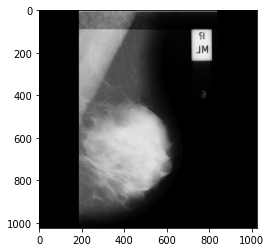

In [99]:
img = cv2.imread("/content/drive/MyDrive/dump/mdb002.png")
plt.imshow(img)

535
(338, 622) (732, 228)


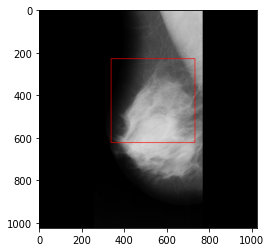

In [100]:
img = cv2.imread("/content/drive/MyDrive/dump/mdb001.png")
print(not_normal_df.X[0])
x = int(not_normal_df.X[0])
y = int(not_normal_df.Y[0])
r = int(not_normal_df.RADIUS[0])
start_point = (x-r,y+r)
end_point = (x+r,y-r)
print(start_point,end_point)
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(img, start_point, end_point, color, thickness)
plt.imshow(image)




#mask = np.zeros(img.shape[:2],np.uint8)
#mask[y:y+h,x:x+w] = 255
#res = cv2.bitwise_and(img,img,mask = mask)
#plt.imshow(res)

In [101]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.rectangle(mask, start_point, end_point, 255, -1)
masked = cv2.bitwise_and(img, img, mask=mask)

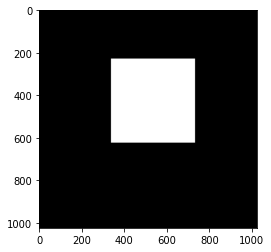

In [102]:
plt.imshow(mask,cmap='gray')
plt.show()

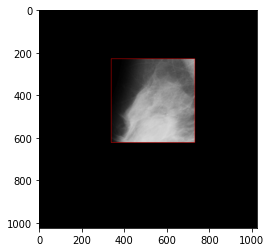

In [103]:
plt.imshow(masked,cmap='gray')
plt.show()

In [104]:
def mask_maker_rectangle(row):
    input_dir_path = '/content/drive/MyDrive/dump/'
    output_dir_path = '/content/drive/MyDrive/mias_reactangle_mask_dump/'
    cropped_output_dir_path = '/content/drive/MyDrive/mias_crop_reactangle_dump/'
    file_name = row['REFNUM']
    input_file_path = input_dir_path+file_name+'.png'
    print(input_file_path)
    output_file_path = output_dir_path+file_name+'_mask.png'
    cropped_output_file_path = cropped_output_dir_path+file_name+'_cropped.png'
    image = cv2.imread(input_file_path)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    x = int(row.X)
    y = int(row.Y)
    r = int(row.RADIUS)
    start_point = (x-r-150,y+r+150)
    end_point = (x+r+150,y-r-150)
    print(start_point,end_point)
    cv2.rectangle(mask, start_point, end_point, 255, -1)
    masked = cv2.bitwise_and(image, image, mask=mask)
    
    plt.imshow(masked)
    plt.show()
    cv2.imwrite(output_file_path,mask)
    cv2.imwrite(cropped_output_file_path,masked)
    print('mask for ',file_name,' generated')

/content/drive/MyDrive/dump/mdb001.png
(188, 772) (882, 78)


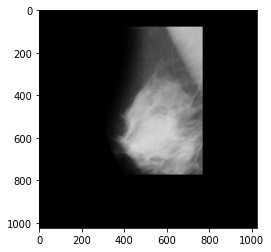

mask for  mdb001  generated
/content/drive/MyDrive/dump/mdb002.png
(303, 499) (741, 61)


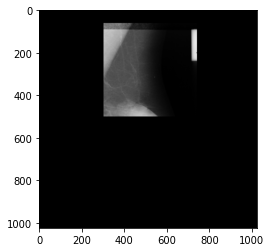

mask for  mdb002  generated
/content/drive/MyDrive/dump/mdb005.png
(297, 313) (657, -47)


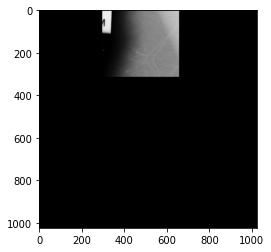

mask for  mdb005  generated
/content/drive/MyDrive/dump/mdb005.png
(324, 344) (676, -8)


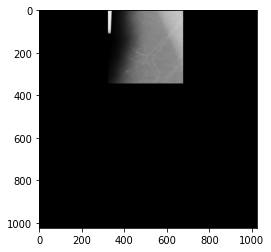

mask for  mdb005  generated
/content/drive/MyDrive/dump/mdb010.png
(342, 608) (708, 242)


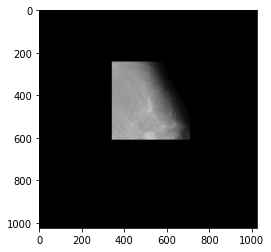

mask for  mdb010  generated
/content/drive/MyDrive/dump/mdb012.png
(281, 648) (661, 268)


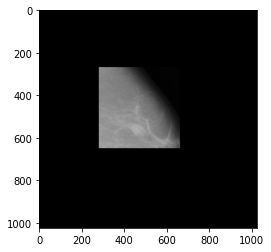

mask for  mdb012  generated
/content/drive/MyDrive/dump/mdb013.png
(486, 546) (848, 184)


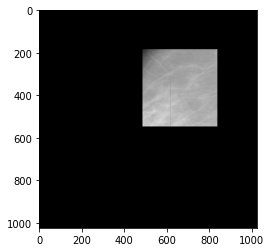

mask for  mdb013  generated
/content/drive/MyDrive/dump/mdb015.png
(377, 1082) (813, 646)


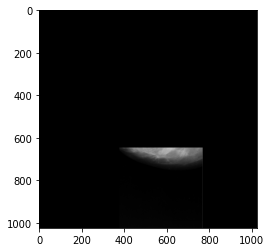

mask for  mdb015  generated
/content/drive/MyDrive/dump/mdb017.png
(349, 771) (745, 375)


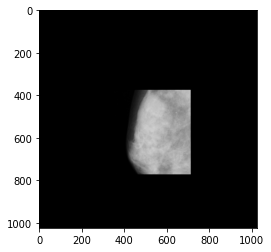

mask for  mdb017  generated
/content/drive/MyDrive/dump/mdb019.png
(454, 676) (852, 278)


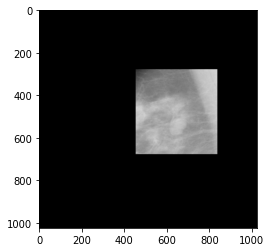

mask for  mdb019  generated
/content/drive/MyDrive/dump/mdb021.png
(294, 324) (692, -74)


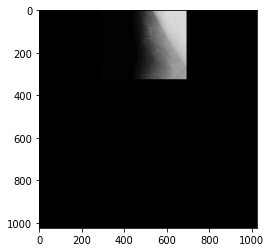

mask for  mdb021  generated
/content/drive/MyDrive/dump/mdb023.png
(359, 860) (717, 502)


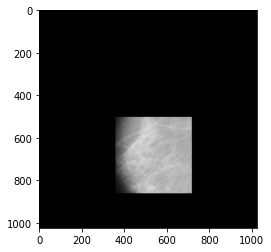

mask for  mdb023  generated
/content/drive/MyDrive/dump/mdb025.png
(445, 672) (903, 214)


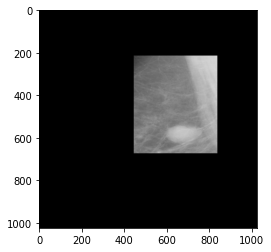

mask for  mdb025  generated
/content/drive/MyDrive/dump/mdb028.png
(132, 520) (544, 108)


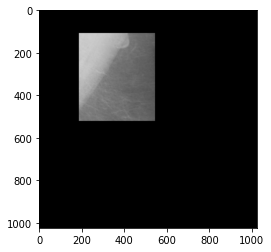

mask for  mdb028  generated
/content/drive/MyDrive/dump/mdb030.png
(129, 869) (515, 483)


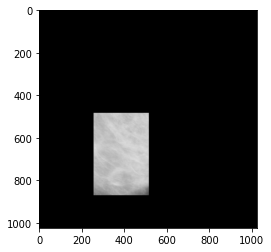

mask for  mdb030  generated
/content/drive/MyDrive/dump/mdb032.png
(172, 958) (604, 526)


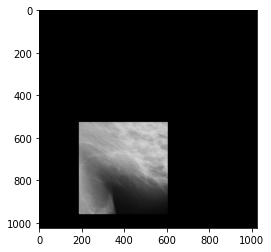

mask for  mdb032  generated
/content/drive/MyDrive/dump/mdb058.png
(141, 536) (495, 182)


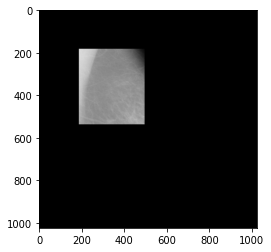

mask for  mdb058  generated
/content/drive/MyDrive/dump/mdb063.png
(363, 646) (729, 280)


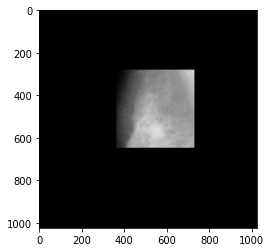

mask for  mdb063  generated
/content/drive/MyDrive/dump/mdb069.png
(268, 600) (656, 212)


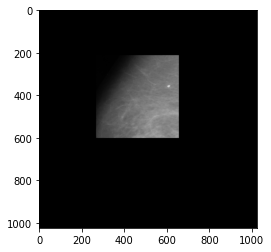

mask for  mdb069  generated
/content/drive/MyDrive/dump/mdb072.png
(88, 695) (444, 339)


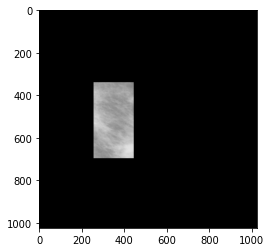

mask for  mdb072  generated
/content/drive/MyDrive/dump/mdb075.png
(295, 890) (641, 544)


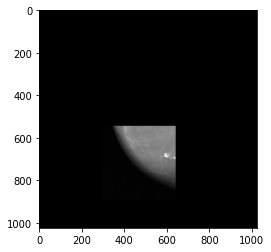

mask for  mdb075  generated
/content/drive/MyDrive/dump/mdb080.png
(262, 319) (602, -21)


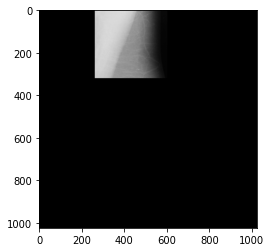

mask for  mdb080  generated
/content/drive/MyDrive/dump/mdb081.png
(211, 754) (773, 192)


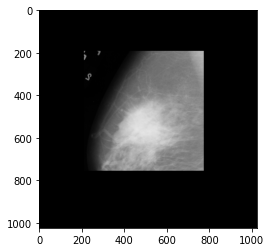

mask for  mdb081  generated
/content/drive/MyDrive/dump/mdb083.png
(356, 382) (732, 6)


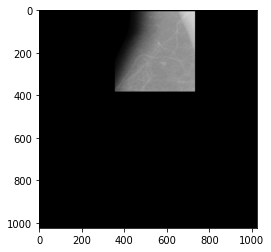

mask for  mdb083  generated
/content/drive/MyDrive/dump/mdb090.png
(311, 746) (709, 348)


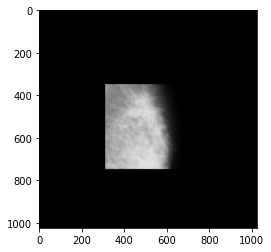

mask for  mdb090  generated
/content/drive/MyDrive/dump/mdb091.png
(510, 664) (850, 324)


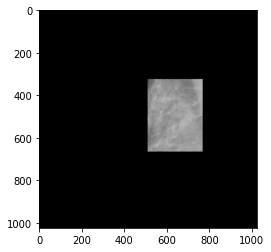

mask for  mdb091  generated
/content/drive/MyDrive/dump/mdb092.png
(230, 855) (616, 469)


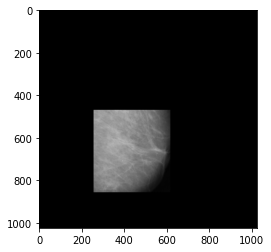

mask for  mdb092  generated
/content/drive/MyDrive/dump/mdb095.png
(287, 696) (645, 338)


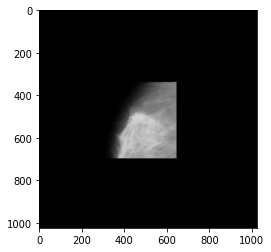

mask for  mdb095  generated
/content/drive/MyDrive/dump/mdb097.png
(428, 481) (796, 113)


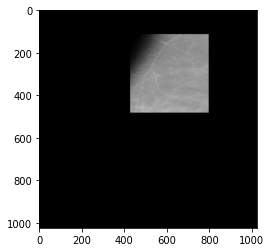

mask for  mdb097  generated
/content/drive/MyDrive/dump/mdb099.png
(541, 513) (887, 167)


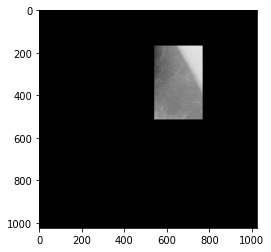

mask for  mdb099  generated
/content/drive/MyDrive/dump/mdb102.png
(227, 648) (603, 272)


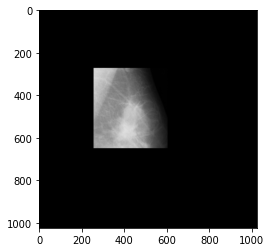

mask for  mdb102  generated
/content/drive/MyDrive/dump/mdb104.png
(157, 565) (557, 165)


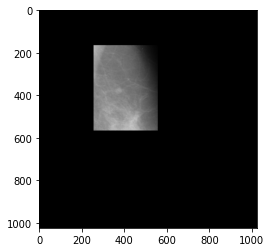

mask for  mdb104  generated
/content/drive/MyDrive/dump/mdb105.png
(268, 527) (764, 31)


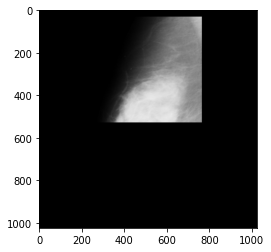

mask for  mdb105  generated
/content/drive/MyDrive/dump/mdb107.png
(339, 882) (861, 360)


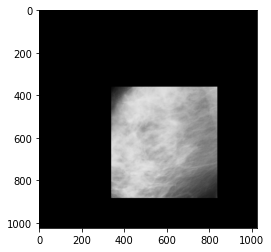

mask for  mdb107  generated
/content/drive/MyDrive/dump/mdb110.png
(-11, 628) (391, 226)


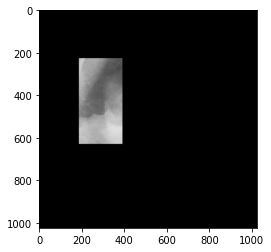

mask for  mdb110  generated
/content/drive/MyDrive/dump/mdb111.png
(248, 832) (762, 318)


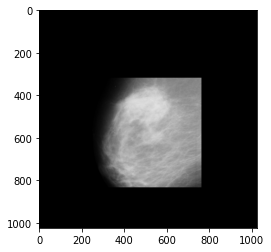

mask for  mdb111  generated
/content/drive/MyDrive/dump/mdb115.png
(194, 799) (728, 265)


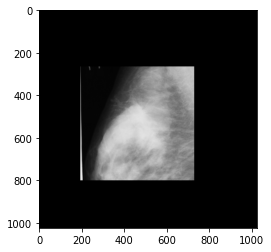

mask for  mdb115  generated
/content/drive/MyDrive/dump/mdb117.png
(246, 810) (714, 342)


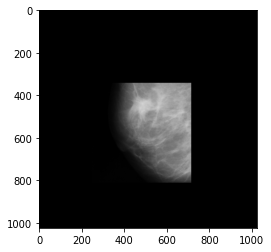

mask for  mdb117  generated
/content/drive/MyDrive/dump/mdb120.png
(194, 491) (652, 33)


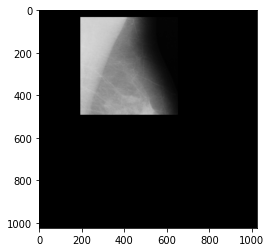

mask for  mdb120  generated
/content/drive/MyDrive/dump/mdb121.png
(255, 671) (729, 197)


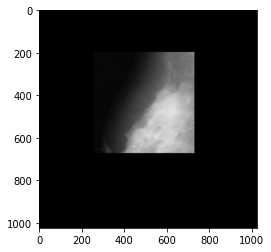

mask for  mdb121  generated
/content/drive/MyDrive/dump/mdb124.png
(183, 803) (549, 437)


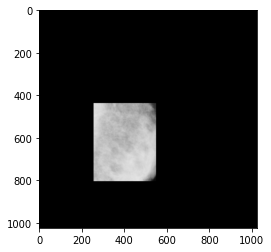

mask for  mdb124  generated
/content/drive/MyDrive/dump/mdb125.png
(490, 762) (910, 342)


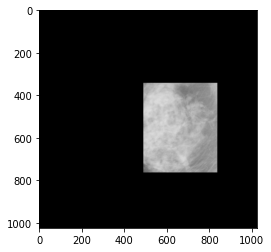

mask for  mdb125  generated
/content/drive/MyDrive/dump/mdb126.png
(18, 722) (364, 376)


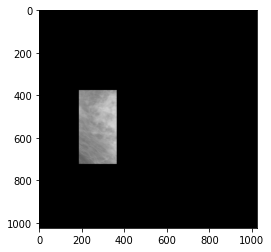

mask for  mdb126  generated
/content/drive/MyDrive/dump/mdb127.png
(325, 749) (721, 353)


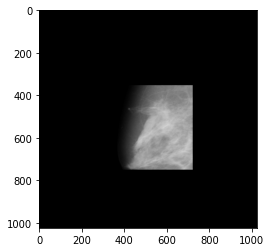

mask for  mdb127  generated
/content/drive/MyDrive/dump/mdb130.png
(42, 730) (398, 374)


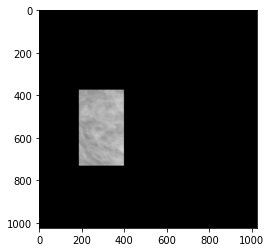

mask for  mdb130  generated
/content/drive/MyDrive/dump/mdb132.png
(50, 990) (454, 586)


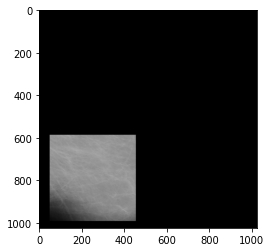

mask for  mdb132  generated
/content/drive/MyDrive/dump/mdb132.png
(167, 934) (503, 598)


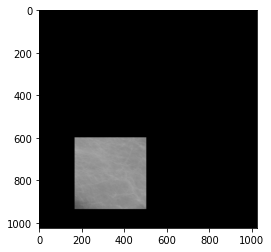

mask for  mdb132  generated
/content/drive/MyDrive/dump/mdb134.png
(270, 927) (668, 529)


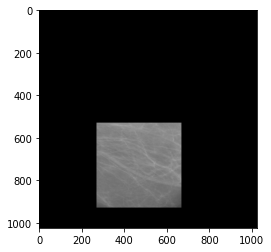

mask for  mdb134  generated
/content/drive/MyDrive/dump/mdb141.png
(291, 938) (649, 580)


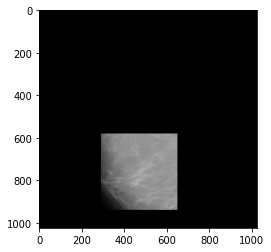

mask for  mdb141  generated
/content/drive/MyDrive/dump/mdb142.png
(171, 812) (523, 460)


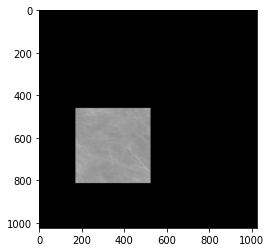

mask for  mdb142  generated
/content/drive/MyDrive/dump/mdb144.png
(54, 1173) (412, 815)


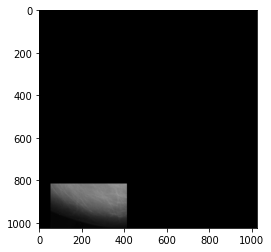

mask for  mdb144  generated
/content/drive/MyDrive/dump/mdb144.png
(136, 717) (490, 363)


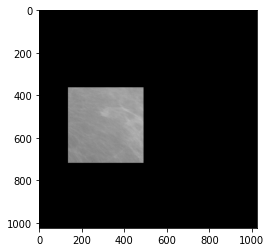

mask for  mdb144  generated
/content/drive/MyDrive/dump/mdb145.png
(470, 742) (868, 344)


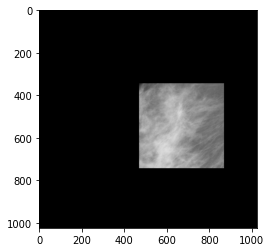

mask for  mdb145  generated
/content/drive/MyDrive/dump/mdb148.png
(2, 931) (650, 283)


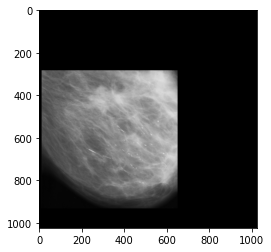

mask for  mdb148  generated
/content/drive/MyDrive/dump/mdb150.png
(139, 873) (563, 449)


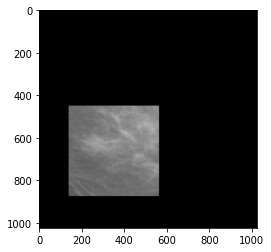

mask for  mdb150  generated
/content/drive/MyDrive/dump/mdb152.png
(477, 684) (873, 288)


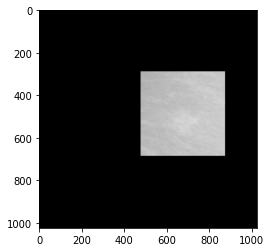

mask for  mdb152  generated
/content/drive/MyDrive/dump/mdb155.png
(203, 725) (693, 235)


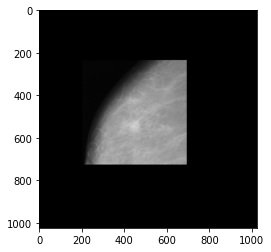

mask for  mdb155  generated
/content/drive/MyDrive/dump/mdb158.png
(302, 803) (778, 327)


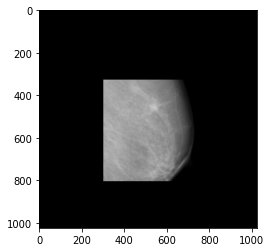

mask for  mdb158  generated
/content/drive/MyDrive/dump/mdb160.png
(325, 730) (747, 308)


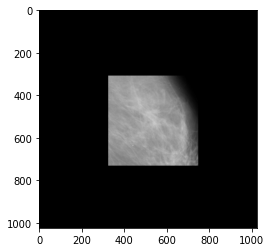

mask for  mdb160  generated
/content/drive/MyDrive/dump/mdb163.png
(191, 565) (591, 165)


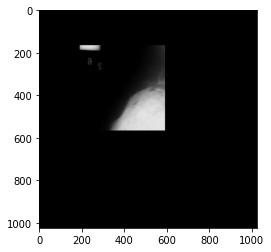

mask for  mdb163  generated
/content/drive/MyDrive/dump/mdb165.png
(345, 682) (729, 298)


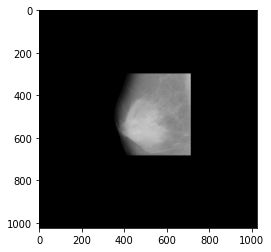

mask for  mdb165  generated
/content/drive/MyDrive/dump/mdb167.png
(389, 842) (759, 472)


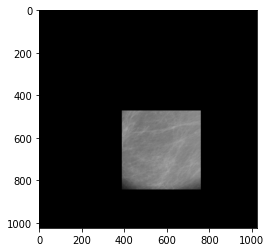

mask for  mdb167  generated
/content/drive/MyDrive/dump/mdb170.png
(257, 712) (721, 248)


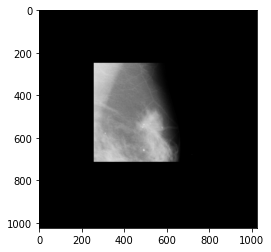

mask for  mdb170  generated
/content/drive/MyDrive/dump/mdb171.png
(250, 839) (674, 415)


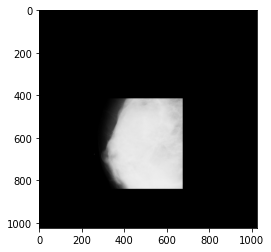

mask for  mdb171  generated
/content/drive/MyDrive/dump/mdb175.png
(409, 853) (775, 487)


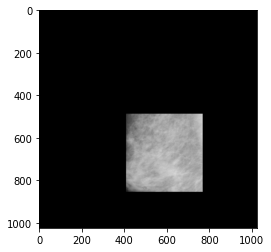

mask for  mdb175  generated
/content/drive/MyDrive/dump/mdb178.png
(272, 820) (712, 380)


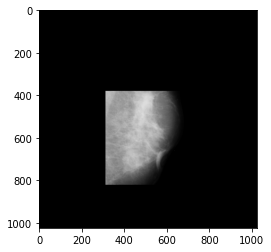

mask for  mdb178  generated
/content/drive/MyDrive/dump/mdb179.png
(383, 731) (817, 297)


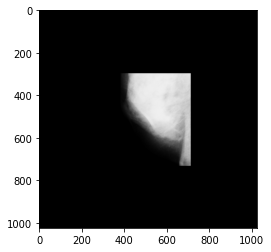

mask for  mdb179  generated
/content/drive/MyDrive/dump/mdb181.png
(315, 566) (723, 158)


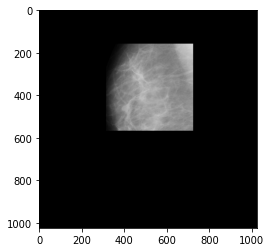

mask for  mdb181  generated
/content/drive/MyDrive/dump/mdb184.png
(88, 888) (616, 360)


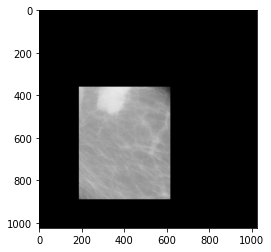

mask for  mdb184  generated
/content/drive/MyDrive/dump/mdb186.png
(206, 721) (600, 327)


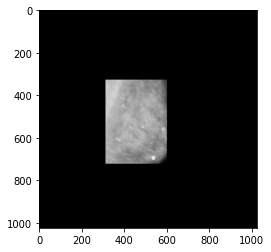

mask for  mdb186  generated
/content/drive/MyDrive/dump/mdb188.png
(195, 828) (617, 406)


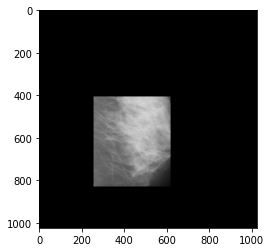

mask for  mdb188  generated
/content/drive/MyDrive/dump/mdb190.png
(331, 802) (693, 440)


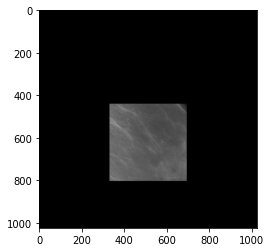

mask for  mdb190  generated
/content/drive/MyDrive/dump/mdb191.png
(403, 707) (785, 325)


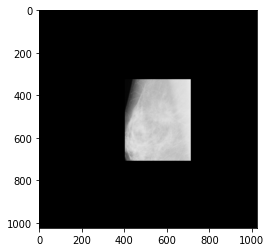

mask for  mdb191  generated
/content/drive/MyDrive/dump/mdb193.png
(117, 845) (681, 281)


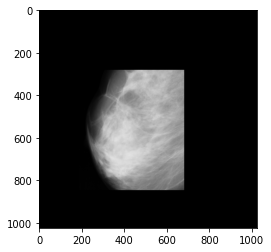

mask for  mdb193  generated
/content/drive/MyDrive/dump/mdb195.png
(549, 305) (901, -47)


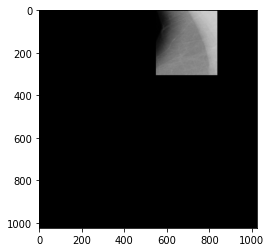

mask for  mdb195  generated
/content/drive/MyDrive/dump/mdb198.png
(325, 855) (811, 369)


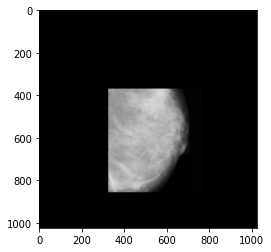

mask for  mdb198  generated
/content/drive/MyDrive/dump/mdb199.png
(460, 358) (822, -4)


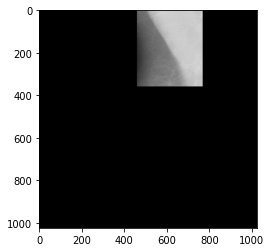

mask for  mdb199  generated
/content/drive/MyDrive/dump/mdb202.png
(370, 959) (744, 585)


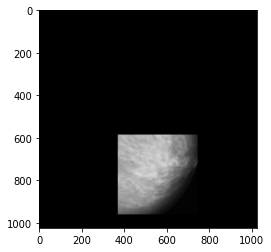

mask for  mdb202  generated
/content/drive/MyDrive/dump/mdb204.png
(165, 570) (507, 228)


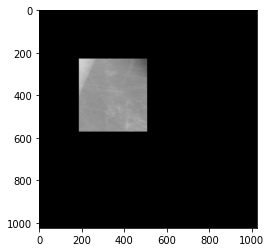

mask for  mdb204  generated
/content/drive/MyDrive/dump/mdb206.png
(201, 367) (535, 33)


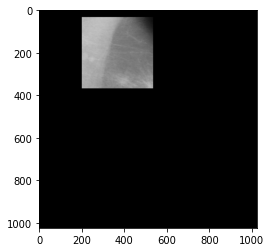

mask for  mdb206  generated
/content/drive/MyDrive/dump/mdb207.png
(402, 733) (740, 395)


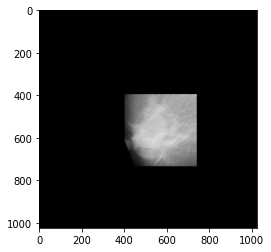

mask for  mdb207  generated
/content/drive/MyDrive/dump/mdb209.png
(410, 740) (884, 266)


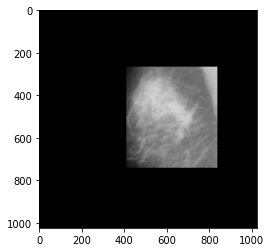

mask for  mdb209  generated
/content/drive/MyDrive/dump/mdb211.png
(517, 490) (843, 164)


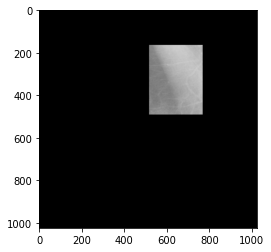

mask for  mdb211  generated
/content/drive/MyDrive/dump/mdb212.png
(534, 1035) (840, 729)


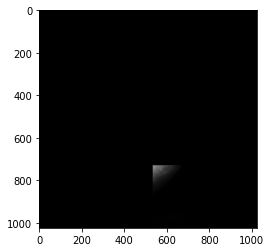

mask for  mdb212  generated
/content/drive/MyDrive/dump/mdb213.png
(352, 715) (742, 325)


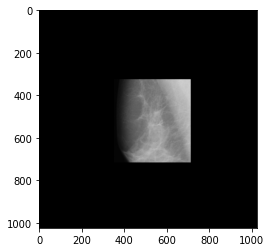

mask for  mdb213  generated
/content/drive/MyDrive/dump/mdb214.png
(421, 1077) (743, 755)


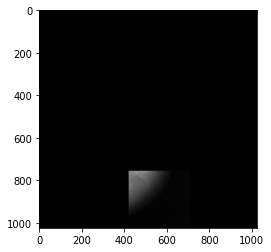

mask for  mdb214  generated
/content/drive/MyDrive/dump/mdb218.png
(361, 787) (677, 471)


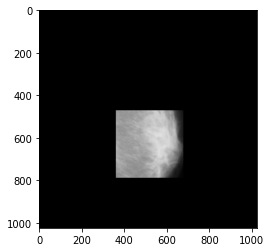

mask for  mdb218  generated
/content/drive/MyDrive/dump/mdb219.png
(367, 935) (725, 577)


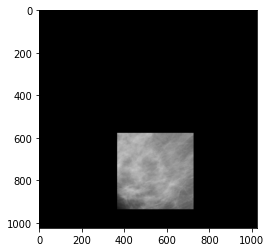

mask for  mdb219  generated
/content/drive/MyDrive/dump/mdb222.png
(231, 594) (565, 260)


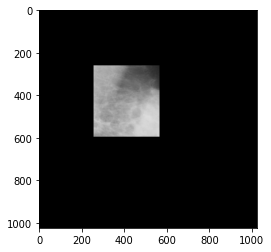

mask for  mdb222  generated
/content/drive/MyDrive/dump/mdb223.png
(344, 661) (702, 303)


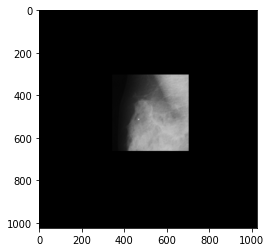

mask for  mdb223  generated
/content/drive/MyDrive/dump/mdb223.png
(435, 685) (747, 373)


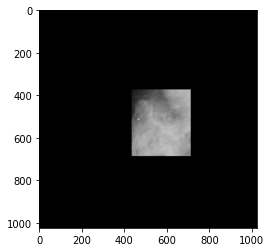

mask for  mdb223  generated
/content/drive/MyDrive/dump/mdb226.png
(130, 767) (444, 453)


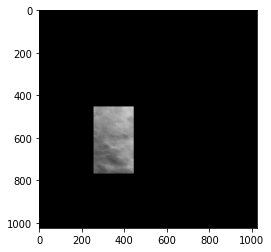

mask for  mdb226  generated
/content/drive/MyDrive/dump/mdb226.png
(154, 725) (504, 375)


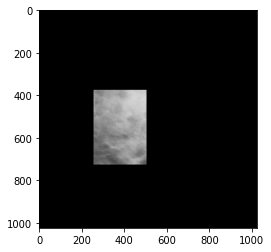

mask for  mdb226  generated
/content/drive/MyDrive/dump/mdb226.png
(373, 879) (689, 563)


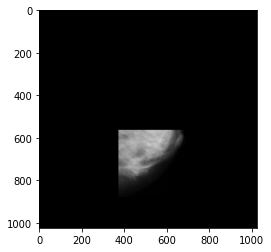

mask for  mdb226  generated
/content/drive/MyDrive/dump/mdb227.png
(345, 626) (663, 308)


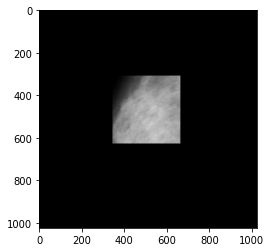

mask for  mdb227  generated
/content/drive/MyDrive/dump/mdb231.png
(409, 732) (797, 344)


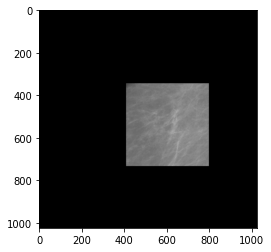

mask for  mdb231  generated
/content/drive/MyDrive/dump/mdb236.png
(112, 988) (440, 660)


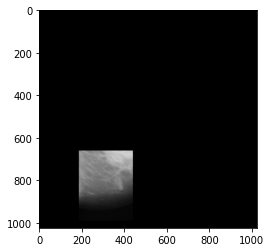

mask for  mdb236  generated
/content/drive/MyDrive/dump/mdb238.png
(355, 720) (689, 386)


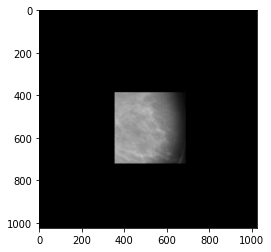

mask for  mdb238  generated
/content/drive/MyDrive/dump/mdb239.png
(455, 945) (835, 565)


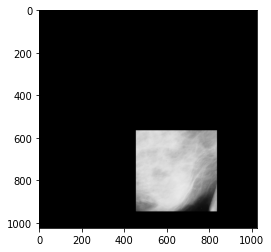

mask for  mdb239  generated
/content/drive/MyDrive/dump/mdb239.png
(392, 983) (742, 633)


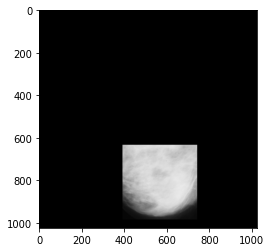

mask for  mdb239  generated
/content/drive/MyDrive/dump/mdb240.png
(470, 787) (816, 441)


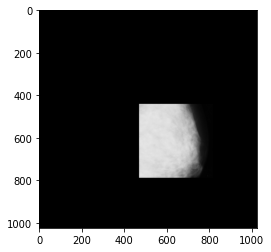

mask for  mdb240  generated
/content/drive/MyDrive/dump/mdb241.png
(265, 866) (641, 490)


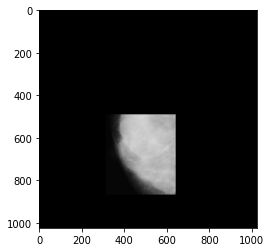

mask for  mdb241  generated
/content/drive/MyDrive/dump/mdb244.png
(264, 769) (668, 365)


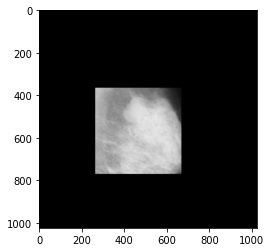

mask for  mdb244  generated
/content/drive/MyDrive/dump/mdb248.png
(218, 761) (538, 441)


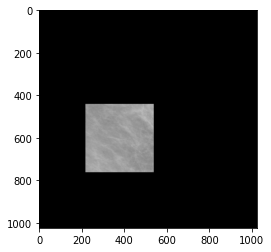

mask for  mdb248  generated
/content/drive/MyDrive/dump/mdb249.png
(346, 706) (742, 310)


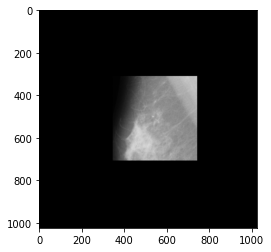

mask for  mdb249  generated
/content/drive/MyDrive/dump/mdb249.png
(361, 853) (789, 425)


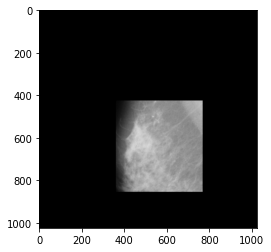

mask for  mdb249  generated
/content/drive/MyDrive/dump/mdb252.png
(266, 540) (612, 194)


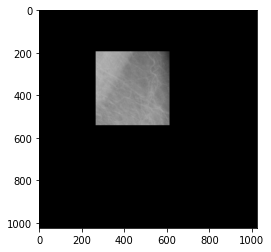

mask for  mdb252  generated
/content/drive/MyDrive/dump/mdb253.png
(555, 742) (911, 386)


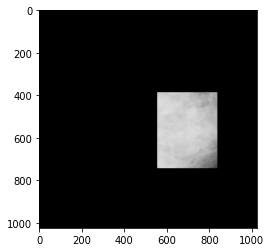

mask for  mdb253  generated
/content/drive/MyDrive/dump/mdb256.png
(213, 671) (587, 297)


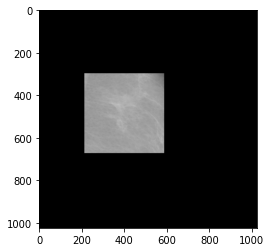

mask for  mdb256  generated
/content/drive/MyDrive/dump/mdb264.png
(410, 617) (782, 245)


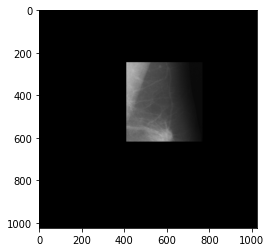

mask for  mdb264  generated
/content/drive/MyDrive/dump/mdb265.png
(383, 708) (803, 288)


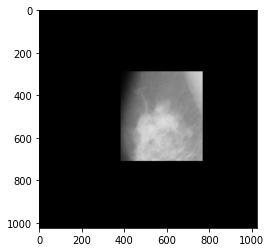

mask for  mdb265  generated
/content/drive/MyDrive/dump/mdb267.png
(587, 687) (999, 275)


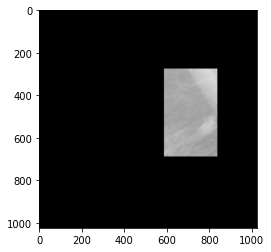

mask for  mdb267  generated
/content/drive/MyDrive/dump/mdb270.png
(134, 1167) (578, 723)


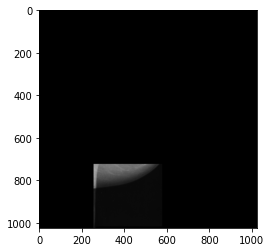

mask for  mdb270  generated
/content/drive/MyDrive/dump/mdb271.png
(566, 488) (1002, 52)


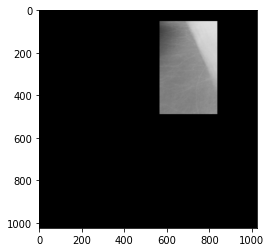

mask for  mdb271  generated
/content/drive/MyDrive/dump/mdb274.png
(-146, 778) (400, 232)


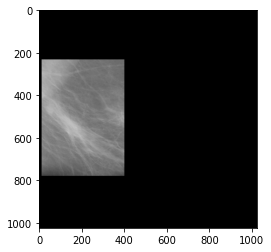

mask for  mdb274  generated
/content/drive/MyDrive/dump/mdb290.png
(142, 548) (532, 158)


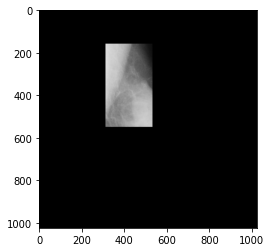

mask for  mdb290  generated
/content/drive/MyDrive/dump/mdb312.png
(70, 433) (410, 93)


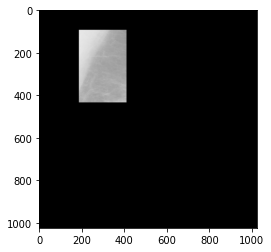

mask for  mdb312  generated
/content/drive/MyDrive/dump/mdb314.png
(329, 380) (707, 2)


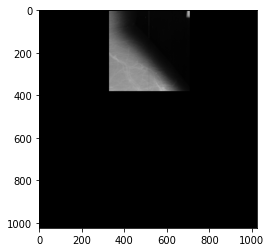

mask for  mdb314  generated
/content/drive/MyDrive/dump/mdb315.png
(273, 690) (759, 204)


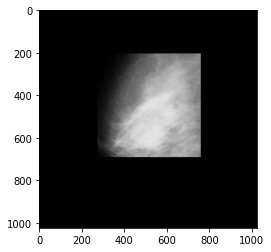

mask for  mdb315  generated


0      None
1      None
4      None
5      None
10     None
       ... 
281    None
297    None
319    None
321    None
322    None
Length: 119, dtype: object

In [105]:
not_normal_df.apply(mask_maker_rectangle,axis=1)

In [106]:
temp_df = not_normal_df[not_normal_df['SEVERITY']=='M']

In [107]:
temp_df

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
23,mdb023,G,CIRC,M,538,681,29
28,mdb028,F,CIRC,M,338,314,56
58,mdb058,D,MISC,M,318,359,27
72,mdb072,G,ASYM,M,266,517,28
75,mdb075,F,ASYM,M,468,717,23
90,mdb090,G,ASYM,M,510,547,49
92,mdb092,F,ASYM,M,423,662,43
95,mdb095,F,ASYM,M,466,517,29
102,mdb102,D,ASYM,M,415,460,38
105,mdb105,D,ASYM,M,516,279,98
